# Perceptrón como clasificador binario

**Objetivo**: que el estudiante entrene, interprete y evalúe un Perceptrón lineal usando un subconjunto binario del dataset Iris (p.ej., setosa vs versicolor), comprendiendo cada decisión del pipeline.

## Cargar el dataset Iris y explorar metadatos

`load_iris()` regresa una estructura con `data`, `target`, `feature_names`, `target_names`. Es útil imprimir nombres para entender qué variables y clases tenemos.

In [37]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import ListedColormap 
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [17]:
# 1) Cargar Iris y explorar
iris = load_iris()

print(iris['DESCR'][:])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [18]:
X_all = iris['data']          # (150, 4)
y_all = iris['target']        # (150,)
feature_names = iris['feature_names']
target_names = iris['target_names']

print("Características disponibles:", feature_names)
print("Clases:", target_names)  # ['setosa' 'versicolor' 'virginica']

Características disponibles: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Clases: ['setosa' 'versicolor' 'virginica']


## Filtrar a dos clases (binario)

El perceptrón clásico es binario. Empezaremos con setosa vs versicolor (deja fuera virginica)

In [19]:
# 2) Filtrar dos clases (setosa=0 y versicolor=1)
X_bin = iris.data[:100, (2,3)]
y_bin = iris.target[:100]

print("Forma X_bin:", X_bin.shape, " | Forma y_bin:", y_bin.shape)
print("Clases presentes:", np.unique(y_bin), "->", target_names[:2])

Forma X_bin: (100, 2)  | Forma y_bin: (100,)
Clases presentes: [0 1] -> ['setosa' 'versicolor']


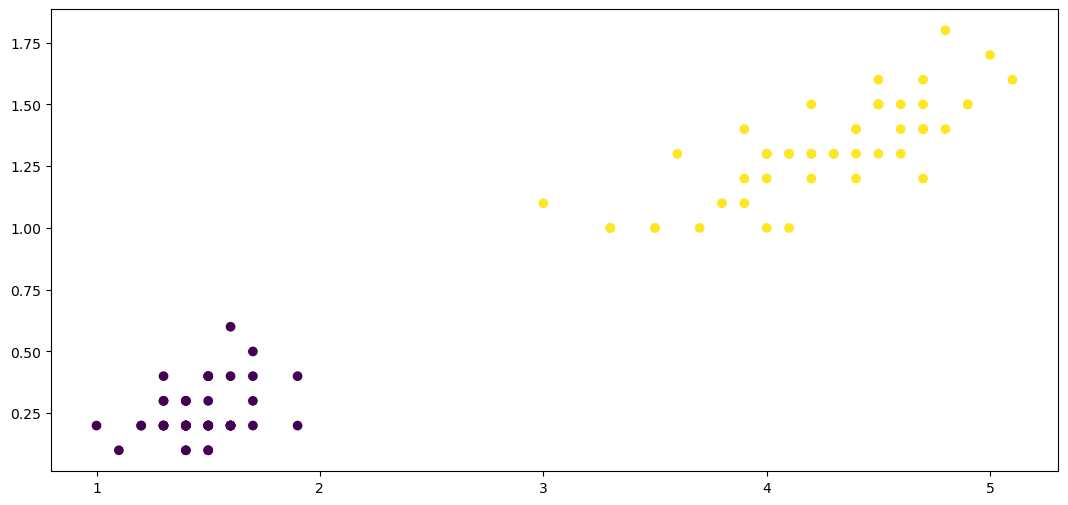

In [32]:
# 3) Seleccionar dos variables (para graficar en 2D)
plt.figure(figsize = (13,6))
plt.scatter(X_bin[:,0], X_bin[:,1], c = y_bin)
plt.show()

In [34]:
ppn = Perceptron()
ppn.fit(X_bin, y_bin)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,0


In [51]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'o','^', 'v', 'x')
    colors = ('red', 'blue', 'gray', 'cyan', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = (
        np.meshgrid(
            np.arange(
                x1_min, 
                x1_max, 
                resolution
            ), 
            np.arange(
                x2_min, 
                x2_max, 
                resolution
            )
        )
    )
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0], 
            y=X[y == cl, 1], 
            alpha=0.8, 
            c=colors[idx], 
            marker=markers[idx], 
            label=cl, 
            edgecolor='black'
        )
    
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o',
                       s=100, label='test set')

<function matplotlib.pyplot.show(close=None, block=None)>

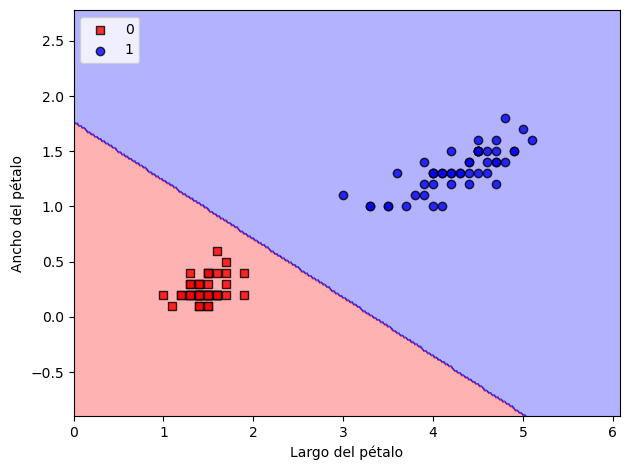

In [52]:
plot_decision_regions(X = X_bin, y = y_bin, classifier = ppn)
plt.xlabel('Largo del pétalo')
plt.ylabel('Ancho del pétalo')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show

Ahora que el modelo esta entrenado, es posible  realizar predicciones con datos nuevos. Por ejemplo, para una flor de iris que sea recolectada.

In [53]:
y1 = ppn.predict([[5.1, 2]])
print(y1)

[1]


In [54]:
y2 = ppn.predict([[1.4, 0.2]])
print(y2)

[0]


¿Se puede confiar en estas predicciones?